
<hr style="border-width:2px;border-color:#75DFC1">
<h1 style = "text-align:center" > Scikit-learn : Modèles de classification </h1> 
<h2 style = "text-align:center" > BONUS : XGBoost</h2>
<hr style="border-width:2px;border-color:#75DFC1">

> XGBoost (E**x**treme **G**radient **Boost**ing) est l'une des bibliothèques de Machine Learning les plus populaires de ces dernières années. C'est notamment un incontournable des compétitions de type [Kaggle](https://www.kaggle.com/competitions), et est adapté aussi bien pour la classification que pour la régression<br><br>

> XGBoost est une implémentation d'algorithmes de Machine Learning reposant sur la technique de Gradient Boosting, mais de manière bien plus efficace, et très flexible.  Il utilise les estimateurs linéaires ou les arbres de décision. Il peut également implémenter directement le calcul parallèle sur n'importe quelle machine, ce qui le rend beaucoup plus rapide que les autres packages utilisant des méhodes de Gradient Boosting.
<br><br>
> Le Gradient Boosting est une généralisation du Boosting dans lequel on va utiliser la fonction de perte de manière similaire à une descente de gradient. A la manière du boosting classique, il n’est pas forcément utilisé avec des arbres de décision même si ils restent la classe préférée d’apprenants faibles.
<br><br>
><div class="alert alert-info">
<i class="fa fa-info-circle"></i> &emsp; 
Pour rappel, la descente de gradient minimise une fonction de perte en suivant la “pente” de cette fonction à l’aide de son gradient ou bien d’une approximation de celui ci.
</div>


> Par design, cette technique de boosting utilise des arbres de décision comme sous jacent. L'idée principale est d'agréger plusieurs modèles créés itérativement mais aussi d'accorder un poids différent à chacun d'entre eux.

> L'approche suivante explique le raisonnement utilisé dans la conception d'un GBT :

> * Prendre une pondération aléatoire (poids $w_i$) pour les classificateurs faibles (paramètres $a_i$) et former un classificateur final

> * Calculer l'erreur induite par ce classificateur final, et chercher le classificateur faible qui s'approche le plus de cette erreur

> * Retrancher ce classificateur faible du classificateur final tout en optimisant son poids par rapport à une fonction de perte

> * Répéter le procédé itérativement

> Le procédure de *gradient boosting* consiste donc à trouver les poids qui optimisent la fonction de coût relative au problème de classification. Il s'agit donc d'explorer un espace de fonctions simples par une descente de gradient.

> XGBoost utilise une variation de la descente de gradient appelée descente de gradient fonctionnelle, puisqu’on travaille dans un espace fonctionnel lorsqu'on parle des classifieurs de l'algorithme du boosting.
> Le gradient de la fonction de perte sert au calcul des poids des individus lors de la construction de chaque nouveau modèle. 


> XGBoost propose d'enregistrer les matrices ou les modèles construit et de les recharger plus tard, pour éviter de relancer les mêmes calculs coûteux plusieurs fois.


>Dans la suite de l'exercice nous travaillerons avec le jeu de données 'adult.csv' qui comprend près de 50 000 observations et 15 attributs à la fois catégoriels et continus.
Il contient des informations issues du recensement de 1994 aux Etats-Unis, relatives à 4983 citoyens américains en 1994.
La dernière colonne '*income*' est une variable binaire prenant la valeur '<=50k' si l’individu gagne moins de 50 000, et '>50k' s’il gagne plus.
>La variable '`income`' sera notre variable cible tout au long de cet execice.


* Importer les packages **numpy** et **pandas**.
* Importer la fonction *`train_test_split`* de **sklearn.model_selection**.
* Importer **xgboost** sous **xgb**.
* Lire dans un *data frame* **adult** le fichier *`adult.csv`*.

In [7]:
## Insérez votre code ici


> Certaines variables contiennent des valeurs manquantes représentées par des `"?"`.
> XGBoost est conçu pour gérer en interne les valeurs manquantes, s'il existe une tendance pour les valeurs manquantes elle est capturée par le modèle. Mais pour cela il faut que celles-ci soient identifiées comme telles.

* Remplacer les valeurs `'?'` des variables *occupation*, *workclass* et *native.country*  par `NaN` (`np.nan`).


In [9]:
## Insérez votre code ici


> Certaines variables sont des variables catégorielles contenant un nombre élevé de modalités. C'est le cas par exemple de **`education`** ou **`native.country`**.

> Les variables **`education`** et **`educational.num`** étant redondantes, on pourra se passer de la première.
> Pour ce qui est de la variable **`native.country`**, un coup d'oeil à ses labels nous indique que près de 90% de la population vient des Etats-Unis alors que 40 pays sont représentés, on peut donc décider de regrouper ces labels par région du monde.

* Supprimer la 4ème colonne du *data set*, correspondant à la variable **`education`**.
* Remplacer les pays `'Cambodia', 'China', 'Hong', 'India','Iran', 'Japan', 'Laos', 'Philippines','Taiwan', 'Thailand','Vietnam'` par `'Asia'`.
* Remplacer les pays `Columbia', 'Cuba', 'Dominican-Republic', 'Ecuador', 'El-Salvador','Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua','Peru', 'Puerto-Rico', 'Trinadad&Tobago', 'South'` par `'Center & South America'`.
* Remplacer les pays `England', 'France', 'Germany', 'Greece', 'Holand-Netherlands', 'Hungary', 'Ireland', 'Italy', 'Poland', 'Portugal', 'Scotland', 'Yugoslavia'` par `'Europe'`.
* Remplacer les pays `'United-States'` et `'Canada'` par `'Canada&USA'`.



In [11]:
## Insérez votre code ici


>L'une des particularité de XGBoost est qu'il nécessite que les données soient au format `matrix`, et n'accepte pas par exemple les *data frames*.
> XGBoost ne travaille qu'avec des vecteurs numériques, il faudra donc convertir toutes les variables catégorielles en variables numériques.
> La solution la plus simple pour cela est l'encodage 'One-hot', qui consiste en la création pour chaque variable d'autant de variables dichotomiques que de modalités présentes.


* Séparer **adult** en deux *data frames*, **features** et **target**, contenant respectivement les variables explicatives et la variable **income** à prédire.
* Transformer les labels '>50K' et '<=50K' de **target** en respectivement 1 et 0.
* Créer un matrice **features_matrix** où toutes les variables catégorielles sont dichotomisées.

In [13]:
## Insérez votre code ici


* Créer à partir de **features_matrix** et **target** , un ensemble de validation représentant 10% des données, puis un ensemble d'apprentissage contenant 80% des données restantes **{X_train, y_train}** et un ensemble de test **{X_test, y_test}**.

In [14]:
## Insérez votre code ici


> Le package **`xgboost`** permet de créer un objet **`xgb.DMatrix`** contenant la matrice des variables et le vecteur des prédictions, à insérer respectivement dans les arguments `data` et `label`. Cet objet permet une utilisation plus facile de certaines fonctions du package utilisés par la suite.

* Créer un objet DMAtrix appelé **train** à partir de **X_train** et **y_train**.
* Créer les objets DMatrix **test** et **valid** équivalents.


In [15]:
## Insérez votre code ici



### Paramètres réglables dans XGBoost

> XGBoost contient sa propre fonction **`train()`** qui permet d'entraîner un modèle, en précisant le jeu d'entraînement et les différents paramètres à régler.

> XGBoost contient un grand nombre d’hyperparamètres qui peuvent être modifiés et réglés pour augmenter la précision, 
> Chaque paramètre a un rôle significatif à jouer dans la performance du modèle.

> Les paramètres de `xgboost` peuvent être séparés en trois catégories:

> Les paramètres généraux qui contrôlent entre autre:
- `booster`: le type de booster utilisé (par défaut `gbtree`)

>- `nthread`: le nombre de coeurs à utiliser pour le calcul parallèle (par défaut tous les coeurs disponibles sont utilisés)


> Les paramètres du booster (on se limitera ici au cas des arbres):
- `num_boost_round`: Le nombre maximum d'itérations/d'arbres construits (par défaut = 100).

>- `learning_rate`: contrôle le 'taux d’apprentissage'. A chaque étape de boosting, on introduit une constante dans la formule de mise à jour des modèles. Elle réduit le poids obtenu par rapport aux performance pour prévenir l'*overfitting*. Une valeur faible entraîne un modèle plus robuste au sur-apprentisage, mais un calcul et une convergence plus lents. Pensez à augmenter le nombre d'arbres lorsque `learning_rate` est faible (vaut 0.3 par défaut, et doit être compris entre 0 et 1).

>- `min_split_loss` : Réduction de perte minimale requise pour effectuer une partition supplémentaire sur un nœud  de l'arbre. Plus il est grand, plus l'algorithme sera conservateur.

> - `max_depth` : Contrôle la profondeur des arbres. Plus les arbres sont profond, plus le modèle est complèxe et plus grandes sont les chances d'*overfitting*. (par défaut=6)

> - `min_child_weight`: critère d'arrêt relatif à la taille minimum du nombre d'observation dans un noeud. (Par défaut vaut 1)

> - `subsample` : permet d'utiliser un sous-échantillon du *dataset* d'entraînement pour chaque arbre (Par défaut = 1, pas de sous-échantillonnage; compris entre 0 et 1)

> - `colsample_bytree` : permet d'utiliser un certain nombre de variables parmi celles d'origine (par défaut = 1, toutes les variables sont séléctionnées; compris entre 0 et 1)

> `reg_lambda` et `reg_alpha` : contrôlent respectivement la régularisation L1 et L2 sur les poids (équivalent aux régression Ridge et Lasso)

> Les paramètres d'apprentissage:

>- `objective`: Fonction objectif à utiliser :<br> 
 - `binary:logistic` pour la classification binaire. Retourne les probabilités pour chaque classe
 - `reg:linear` pour la régression
 - `multi:softmax` pour la classification multiple en utilisant la fonction softmax. Retourne les labels prédits.
 - `multi:softprob`pour la classification multiple en utilisant la fonction softmax. Retourne les probabilités pour chaque classe.
> - `eval_metric`: Métrique d'évaluation (par défaut l'erreur de prédiction pour la classification, le RMSE pour la régression).<br> Les métriques disponibles sont: `mae(Mean Absolute Error), Logloss, AUC, RMSE, error mologloss`, etc...
> - `early_stopping_rounds`: pour arrêter l'apprentissage quand l'évaluation sur l'ensemble de test ne s'améliore plus durant un certain nombre d'itérations. L'erreur de validation doit diminuer au moins tous les *early_stopping_rounds* pour continuer l'entraînement.

>Au delà de la régression et de la classification, XGBoost supporte toutes les fonctions objectif définies par l'utilisataur, ainsi que les métriques d'évaluations personnalisées. Ce qui lui donne une grande flexibilité.

> Le paramètre `dtrain` permet de préciser la matrice d'entraînement à utiliser, et `evals` prend une liste en argument qui lui permet d'afficher les scores obtenues pour les échantillons qu'elle contient.


* Créer un dictionnaire **params** contenant les paramètres par défaut, avec `booster : "gbtree`, `learning_rate : 1`, `objective : "binary:logistic`. 
* A l'aide de la fonction `xgb.train()`, entraîner un modèle nommé **xgb1** sur **train**, avec les paramètres **params** et les arguments suivants:  `num_boost_round = 100, early_stopping_rounds= 15, evals= [(train, 'train'), (test, 'eval')])`.

>La fonction affichera l'évolution de l'erreur pour les deux ensembles de données au fil des itérations de boosting.

In [32]:
## Insérez votre code ici


[0]	train-error:0.14432	eval-error:0.142288
Multiple eval metrics have been passed: 'eval-error' will be used for early stopping.

Will train until eval-error hasn't improved in 15 rounds.
[1]	train-error:0.137097	eval-error:0.135237
[2]	train-error:0.135703	eval-error:0.134782
[3]	train-error:0.130869	eval-error:0.131938
[4]	train-error:0.128594	eval-error:0.131711
[5]	train-error:0.125068	eval-error:0.131028
[6]	train-error:0.121484	eval-error:0.130118
[7]	train-error:0.121172	eval-error:0.12955
[8]	train-error:0.120347	eval-error:0.129208
[9]	train-error:0.120119	eval-error:0.128867
[10]	train-error:0.119209	eval-error:0.129095
[11]	train-error:0.118783	eval-error:0.130005
[12]	train-error:0.118698	eval-error:0.129095
[13]	train-error:0.118385	eval-error:0.129436
[14]	train-error:0.117077	eval-error:0.129777
[15]	train-error:0.116991	eval-error:0.129663
[16]	train-error:0.116081	eval-error:0.130346
[17]	train-error:0.115626	eval-error:0.13046
[18]	train-error:0.114034	eval-error:0.1

> Avec un `learning_rate = 1`, on s'aperçoit que très rapidement, l'erreur de l'échantillon de validation cesse de décroître, et l'écart se creuse entre les deux erreurs au fur et à mesure des itérations.

> A chaque itération de l'algorithme de Gradient Boosting, de nouveaux arbres sont créés pour corriger les erreurs résiduelles dans les prédictions à partir de la séquence d'arbres existante.

>Ainsi, le modèle peut s'adapter très rapidement, puis **overfitter** sur l'ensemble de données d'apprentissage.

>Une technique pour ralentir l'apprentissage dans l'algorithme de Gradient Boosting consiste à appliquer un facteur de pondération pour les corrections apportées par les nouveaux arbres lorsqu'ils sont ajoutés au modèle.

>Cette pondération s'appelle, le plus souvent, le **learning rate**. En ajoutant ce facteur de rétrécissement (ie un `learning_rate <1` ), l'ajout de chaque arbre aura un impact diminué sur le modèle, en conséquence un plus grand nombre d'arbres doivent être ajoutés au modèle.

> En outre, plus le `learning_rate` est bas, mieux le modèle converge vers son optimum, mais plus cette convergence est longue, donc l'entraînement du modèle plus lent.
> A l'inverse, un `learning_rate` élevé, permet un entraînement plus rapide, mais moins optimal.

> Pour profiter au mieux de XGBoost, il faut donc privilégier le `learning_rate` le plus bas possible et un nombre d'arbres élevé, tout en gardant un temps de calcul raisonnable.

* Créer un nouveau modèle **xgb2**, identique au précédent, avec un `learning_rate` à 0.01, et 700 itérations de boosting.

In [1]:
## Insérez votre code ici


> On remarque facilement que l'apprentissage se fait plus lentement, et que l'écart entre l'erreur d'apprentissage et de test et fortement réduit.

> Cependant, l'erreur d'évaluation finale est déjà approximativement atteinte avant la fin des 700 itérations, or chaque itération peut s'avérer coûteuse en temps de calcul dans certains cas, comme par exemple lors d'une évaluation du modèle par validation croisée.
> Pour éviter de perdre du temps précieux, il est possible d'utiliser le paramètre `early_stopping_rounds` pour arrêter l'apprentissage lorque l'erreur de validation ne diminue plus au delà d'un certain nombre d'itération.

> Si `early_stopping_rounds` est utilisé, le modèle aura 3 attributs supplémentaires `best_score, best_iteration et best_ntree_limit`.
> Par défaut, le modèle retourné sera celui de la dernière itération. Pour utiliser le meilleur afin d'effectuer des prédictions, il est possible d'utiliser par exemple `xgb_model.predict(test, ntree_limit= xgb_model.best_ntree_limit)`.

> La fonction `xgb.plot_importance` permet d'afficher un graphique en barres affichant par ordre décroissant l'importance de chaque *feature* pour un modèle. <br> 
* Afficher le graphique d'importance pour **xgb2**, en limitant le nombre de variables affichées à 15 grâce au paramètre `max_num_features`

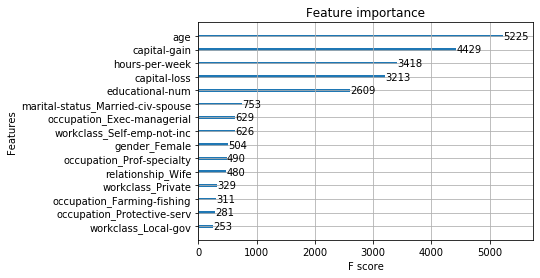

In [34]:
## Insérez votre code ici


> En observant le graphique obtenu, on constate que l'âge domine les autres variables, se démarquant clairement comme le prédicteur le plus important du revenu. <br>
>Nous pourrions nous arrêter ici et conclure par la réponse intuitivement satisfaisante que l'âge est la variable la plus importante, suivie des heures travaillées par semaine et du niveau de scolarité. <br>
Mais avant cela, regardons le fonctionnement de la fonction dans la documentation: On s'aperçoit qu'il y a trois options pour mesurer l'importance des *features* dans XGBoost :
 - **'Weight'** (par défaut): le pourcentage représentant le nombre relatif de fois qu'une *feature* apparaît dans les arbres du modèle.
 - **'Cover'**: Le nombre de fois qu'une *feature* est utilisée pour séparer les données dans l'ensemble des arbres, pondérés par le nombre de données d'entraînement qui passent par ces séparations.
 - **'Gain'**: La réduction moyenne de la fonction de perte obtenue lors de l'utilisation d'une *feature* pour séparer une branche. 
 
> Il est important de comprendre le fonctionnement de ces métriques pour bien interpréter les résultats affichés,
Par exemple en utilisant **'Weight'** , il est logique qu'une variable avec un grand nombre de valeurs possibles comme l'age, qui puisse être utilisée un grand nombre de fois dans un arbre, ait une importance bien supérieur à une variable binaire comme le genre, qui ne peut être utilisée au maximum une fois dans chaque arbre. Alors que le genre pourrait être une *feature* qui affecte grandement les résultats finaux et avoir une grande importance, basé sur le **'Gain'** ou la **'Cover'**.

>Une valeur plus élevée de la métrique **'Gain'** pour une *feature* par rapport à une autre, implique qu'elle est plus importante pour générer une prédiction.
Il s'agit donc, pour beaucoup, de la métrique la plus pertinente pour interpréter l'importance relative de chaque *feature*.

* Exécuter la cellule suivante pour afficher les features importantes selon les différentes métriques disponibles.

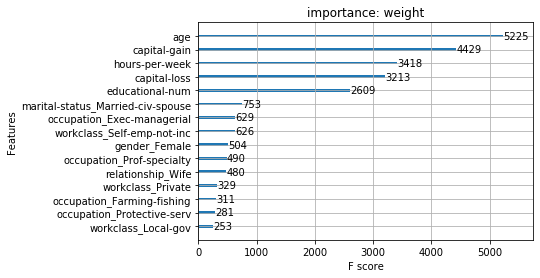

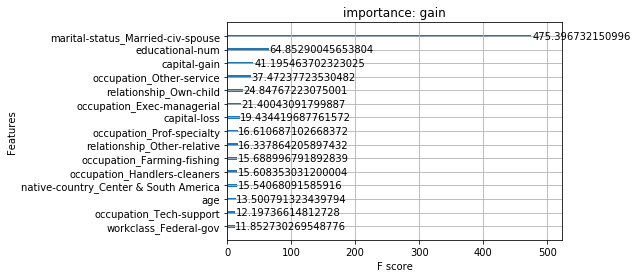

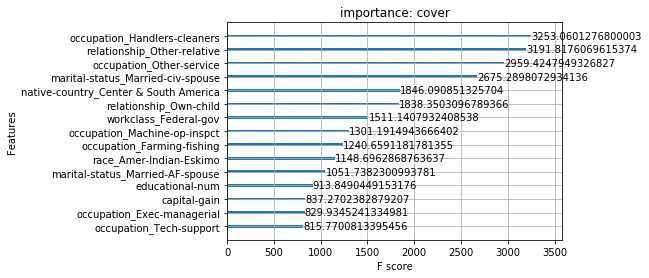

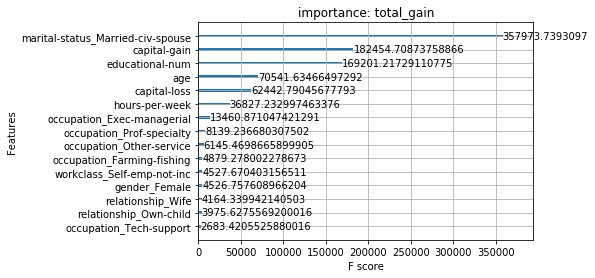

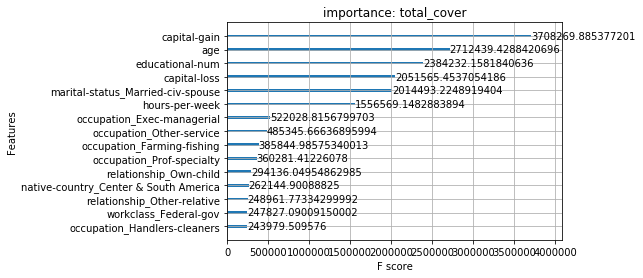

> XGBoost contient sa propre fonction **`xgb.cv()`** qui permet d'utiliser la validation croisée pour l'évaluation d'un modèle, sans avoir besoin de passer par un package externe.
> Elle s'utilise de la même manière que **`train()`**, avec des arguments supplémentaires comme `nfold` pour choisir le nombre d'échantillons pour la validation croisée, et retourne un tableau des scores d'entraînement et de test pour chaque itération.

* Retourner, dans **bst_cv**, les résultats obtenus par cross-validation à 3 échantillons sur **train**, avec 100 itérations de boosting par étape, avec `early_stopping_rounds= 60` pour stopper l'entraînement de chaque échantillon si l'évaluation ne s'améliore pas pendant 60 itérations. 

* Afficher **bst_cv**.

In [36]:
## Insérez votre code ici




,train-error-mean,train-error-std,test-error-mean,test-error-std
0,0.143765,0.000282,0.145997,0.001506
1,0.143765,0.000248,0.145997,0.001538
2,0.142884,0.000646,0.144974,0.000865
3,0.142884,0.000646,0.144974,0.000865
4,0.142884,0.000646,0.144974,0.000865
...,...,...,...,...
95,0.137750,0.000773,0.141846,0.001928
96,0.137708,0.000759,0.141846,0.001942
97,0.137708,0.000759,0.141902,0.001902
98,0.137651,0.000771,0.141817,0.001919


* Stocker dans **preds** les probabilités obtenus avec  **xgb2** sur **test**.
* Créer une Series **xgbpreds** contenant les labels correspondant aux probabilités obtenus, en utilisant un seuil de 0.5 (ie. 1 si la probabilité >=0.5, 0 sinon).

* Afficher une matrice de confusion entre **xgbpreds** et les labels de l'ensemble de test.

In [45]:
## Insérez votre code ici


col_0,0,1
income,,
0,565,130
1,163,45


> Il est possible obtenir l'erreur de prédiction du modèle sur un échantillon directement depuis une *DMatrix*, grâce à la méthode `eval()`.

* Afficher l'erreur du modèle sur l'échantillon de validation contenu dans **valid**.

In [47]:
## Insérez votre code ici


'[0]\teval-error:0.128557'

> Le modèle crée, sans réel tuning des paramètres, nous offre déjà un score plus que correct. Le taux de bonnes prédiction peut probablement être amélioré avec une procédure de *tuning* de paramètres avec un GridSearch.

>A titre de comparaison, un modèle de RandomForest obtient une accuracy de minimum 2 points de moins sur les mêmes données. 




>Nous concluons ici ce module important sur les principaux algorithmes de classification en Apprentissage Supervisé.<br>
Les différents algorithmes vus dans ce cours ont tous leurs propres avantages et inconvénients, vous avez vu comment les utiliser ainsi que les différentes techniques pour les évaluer.<br>
